In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
df_index = pd.read_csv("economic_index.csv")

In [5]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
## Dropping year, month, Unnamedd
df = df_index.drop(columns = ["Unnamed: 0", 'year', "month"], axis=1)

In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [8]:
## checking null values 
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

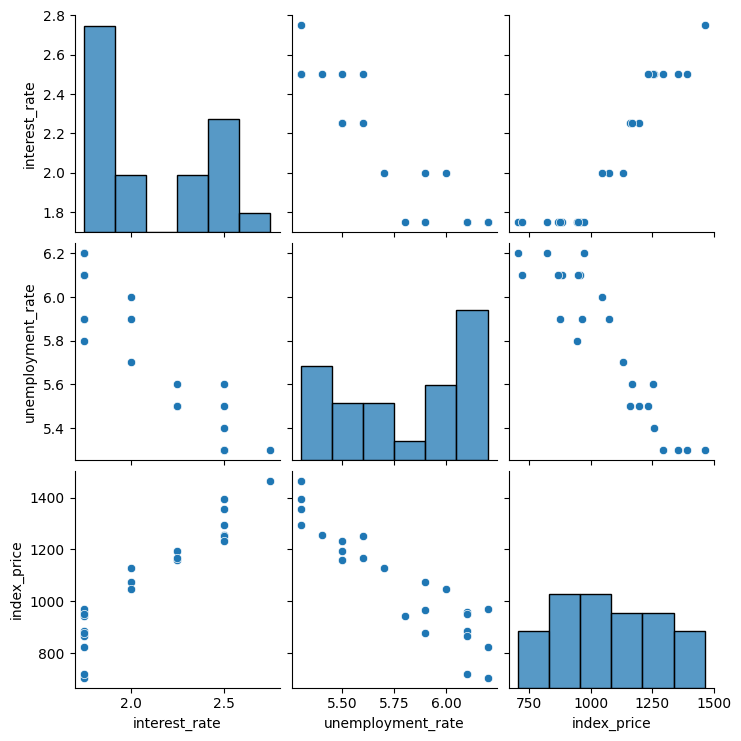

In [9]:
## visualization
sns.pairplot(df)

#### Observation
1. Linear relation between interest_rate and index_price
2. Inverse relation between unemployment_rate and interest_rate 
3. Inverse relation between unemployment_rate and index_price 

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


#### Observation 
1. Positive correlation between interest_rate and index_price
2. Negative correlation between unemployment_rate and interest_rate
3. Negative correlation between unemployment_rate and index_price

Text(0, 0.5, 'unemployment_rate')

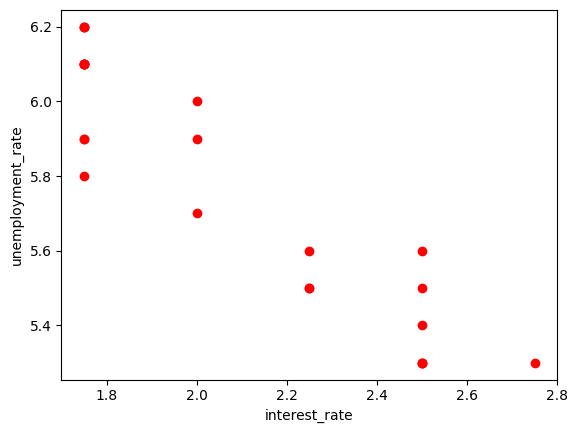

In [11]:
## Visualizing the datapoints 
plt.scatter(df['interest_rate'], df['unemployment_rate'], color="red")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [12]:
## Independed and dependent feature 
X = df.iloc[:, :-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
# y = df['index_price'] 
y = df.iloc[:, -1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [14]:
## Train-test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

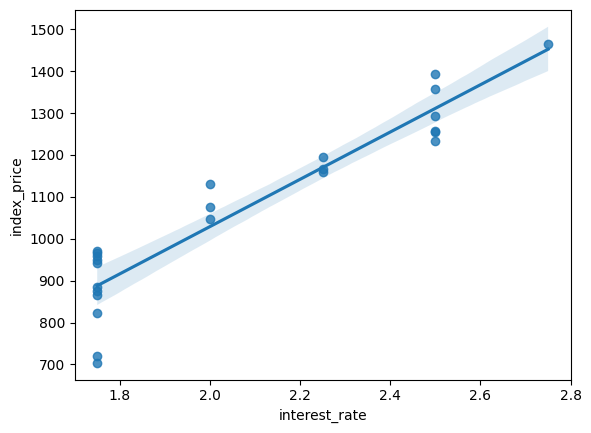

In [15]:
## Reg Plot
sns.regplot(x=df['interest_rate'], y= df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

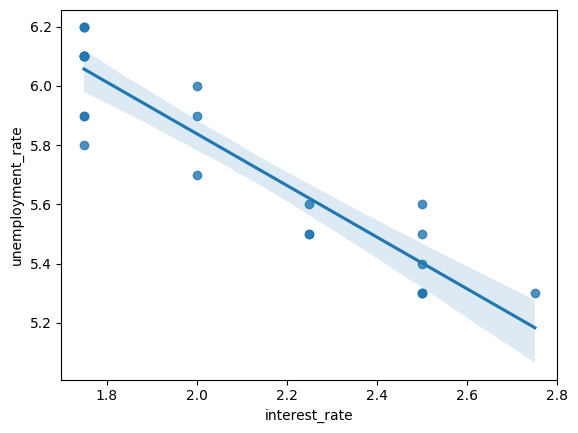

In [16]:
sns.regplot(x=df['interest_rate'], y= df['unemployment_rate'])

In [17]:
## Normalization 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [18]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [35]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression()

regression.fit(X_train, y_train)

print("coefficient : ", regression.coef_)
print("intercept : ", regression.intercept_)

coefficient :  [  88.27275507 -116.25716066]
intercept :  1053.4444444444443


In [21]:
## Cross validation 
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [22]:
## Average of validation_score
np.mean(validation_score)

np.float64(-5914.828180162386)

In [23]:
## Prediction
y_pred = regression.predict(X_test)
y_pred


array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [24]:
## Performance metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("mean_squared_error :",mse)
print("mean_absolute_error : ",mae)
print("root_mean_squared_error :",rmse)

mean_squared_error : 8108.567426306604
mean_absolute_error :  73.80444932337097
root_mean_squared_error : 90.04758423359621


In [25]:
## R2 and Adjusted R2
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("r2_score : ",score)

## Adjusted R-squared
adjusted_r2 = 1 - (1-score)*(len(y_test) -1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R-squared : ",adjusted_r2)

r2_score :  0.7591371539010257
Adjusted R-squared :  0.5985619231683761


### Assumptions

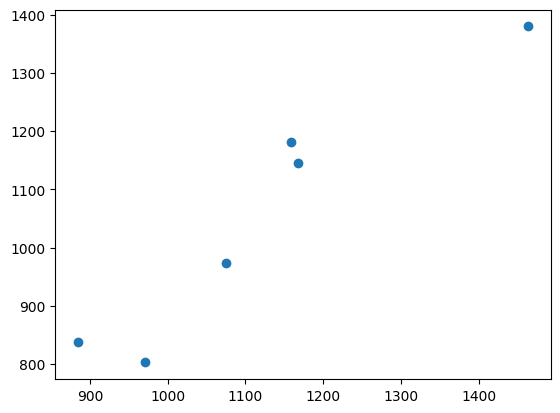

In [26]:
plt.scatter(y_test, y_pred)

In [28]:
## Error in model
residuals = y_test - y_pred 
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


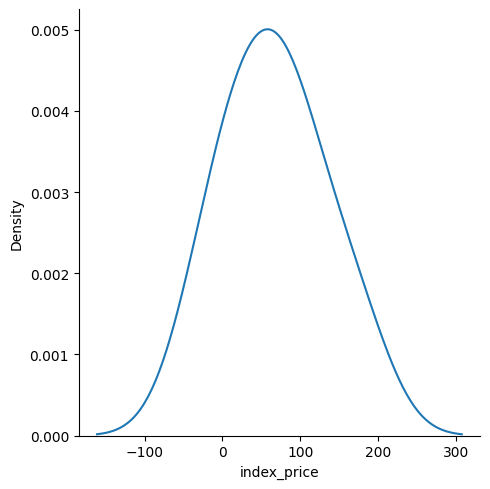

In [29]:
## Ploting residuals 
sns.displot(residuals, kind='kde')

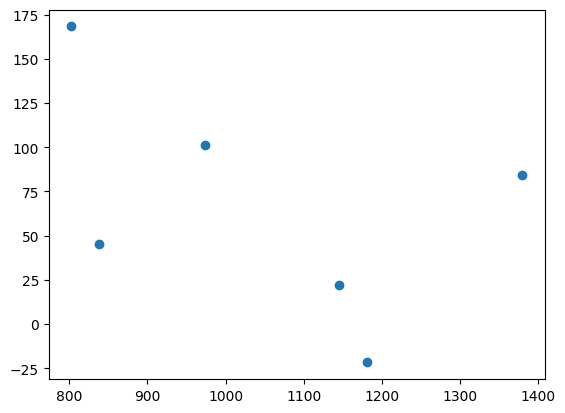

In [30]:
## Scatter plot with respect to prediction and residuals 
plt.scatter(y_pred, residuals)

In [33]:
## OLS Linear Regression 
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                       0.754
Time:                        09:06:08   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\complete-machine-learning\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)
